<a href="https://colab.research.google.com/github/h-ueno2/intern_sample/blob/main/notebook/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニングを使用した画像分類の実例
ディープラーニングを用いて画像の分類を行います。  
今回は画像分類のチュートリアルにてよく用いられるMNISTという手書き数字画像のデータセットを対象として、実践してみます。


## ライブラリのインポート
Pythonにおけるディープラーニングのライブラリとしては以下が有名です。
- TensorFlow および Keras
- PyTorch

今回の例ではTensorFlowおよびKerasを使用してみましょう。

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import utils as np_utils
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten

## データセットの取得
今回使用するデータを取得します。  
MNISTはよく使用されるデータセットなので、Kerasのライブラリの中に含まれています。  

データは以下の4種類で取得できます。

|変数名|説明|
|---|---|
|x_train|モデルの学習の際に使用します。学習を行う画像のデータです。|
|y_train|モデルの学習の際に使用します。学習を行う画像に対する正解のラベルになります。|
|x_test|学習後のモデルの評価に使用します。テストとして推測する問題となる画像のデータです。|
|y_test|学習後のモデルの評価に使用します。テスト用画像の正解ラベルになります。|



In [2]:
# MNISTのデータを取得します。
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# データ数などを確認
print('学習時の教師データ=======')
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('学習後のテストデータ=======')
print('x_test:  ', x_test.shape)
print('y_test:  ', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
学習時の教師データ=======
x_train:  (60000, 28, 28)
y_train:  (60000,)
学習後のテストデータ=======
x_test:   (10000, 28, 28)
y_test:   (10000,)


画像データである`x_train`, `x_test`を確認すると、`(60000, 28, 28)`という出力がされています。  
これは、28x28サイズの画像が60000枚あるという事を意味しています。

また、`y_train`, `y_test`には各画像が何を表しているかという正解のラベルが格納されています。

実際に何枚か表示してみましょう。

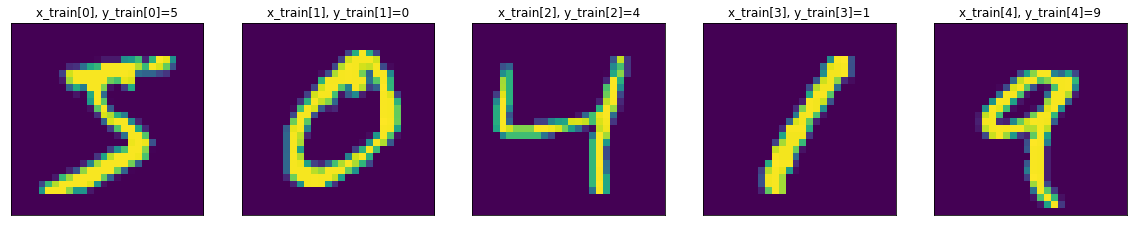

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, (image, label) in enumerate(zip(x_train[:5], y_train[:5])):
    ax[idx].imshow(image)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)
    ax[idx].set_title('x_train[{}], y_train[{}]={}'.format(idx, idx, label))

ちょっと今回の時間で行うにはデータが多すぎるので減らします。

In [4]:
# ちょっと多すぎるので減らします。
train_size = 1000
test_size = 100
x_train, y_train = x_train[:train_size], y_train[:train_size]
x_test, y_test = x_test[:test_size], y_test[:test_size]
print('学習時の教師データ=======')
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('学習後のテストデータ=======')
print('x_test:  ', x_test.shape)
print('y_test:  ', y_test.shape)

学習時の教師データ=======
x_train:  (1000, 28, 28)
y_train:  (1000,)
学習後のテストデータ=======
x_test:   (100, 28, 28)
y_test:   (100,)


## モデルの作成
画像を分類するためのモデルを作成しましょう。

まずはモデルの作成に必要な定数を定義します。

In [5]:
# 分類するクラス数
num_classes = 10

# 画像のサイズ
input_shape = x_train.shape[1:]

モデルを作成します。  
今回は全結合層という層が2層の単純なネットワークを作成します。

In [6]:
def sample_model():
    # モデルの構成を定義します。
    inputs = Input(input_shape)
    x = tf.keras.layers.Lambda(lambda image: image/255.0)(inputs) # 入力画像を扱いやすいように1～0の範囲で正規化します
    x = Flatten(input_shape=input_shape)(x) # 28x28の配列を784の配列にします。
    x = Dense(128, activation='relu')(x) # 1つ目の全結合層
    outputs = Dense(num_classes, activation='softmax')(x)  # 2つ目の全結合層
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # モデルのコンパイル
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

# モデルを作成
model = sample_model()

# モデルの構造を確認します
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## モデルの学習

それでは作成したモデルを学習してみましょう。

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


21/21 [==============================] - 1s 4ms/step - loss: 1.6527 - accuracy: 0.5420
Epoch 2/5
21/21 [==============================] - 0s 3ms/step - loss: 0.7590 - accuracy: 0.8340
Epoch 3/5
21/21 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8860
Epoch 4/5
21/21 [==============================] - 0s 4ms/step - loss: 0.3682 - accuracy: 0.9100
Epoch 5/5
21/21 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.9270


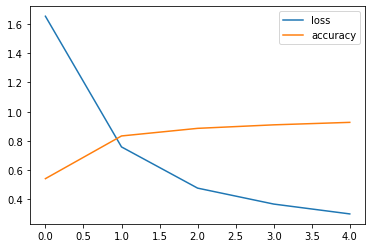

In [7]:
# ハイパーパラメータ
#  モデルの学習時に設定するパラメータです。
batch_size = 48
epochs = 5

# モデルを作成
model = sample_model()
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
)

# 学習曲線の表示
pd.DataFrame(history.history).plot()

## モデルの評価
テストデータを使ってモデルの汎化性能を検証します。  
※汎化性能：未知のデータに対してちゃんと予測できるかという性能

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

4/4 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8500


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


0.8500000238418579

## モデルの予測結果を確認
モデルに実際に予測させて結果を確認してみます。

In [9]:
predict = model.predict(x_test, batch_size=batch_size)
predict = predict.argmax(axis=1)

print('予測結果の一覧:', predict)

予測結果の一覧: [7 2 1 0 4 1 4 9 4 9 0 2 9 0 1 3 9 7 3 4 9 6 4 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 3 2 4 4 6 3 5 5 2 0 4 1 9 5 7 2 9 2 7 9 2 4 3 0 7 0 2 7
 1 7 3 7 9 7 9 6 2 7 8 4 7 5 6 1 3 6 9 3 1 4 1 7 6 9]


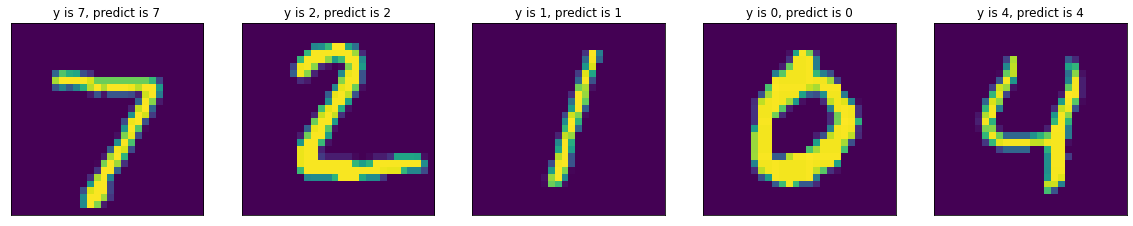

In [10]:
# 5枚程試しに表示
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, (image, y, pred) in enumerate(zip(x_test[:5], y_test[:5], predict[:5])):
    ax[idx].imshow(image)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)
    ax[idx].set_title('y is {}, predict is {}'.format(y, pred))

間違えた画像を見てみましょう。

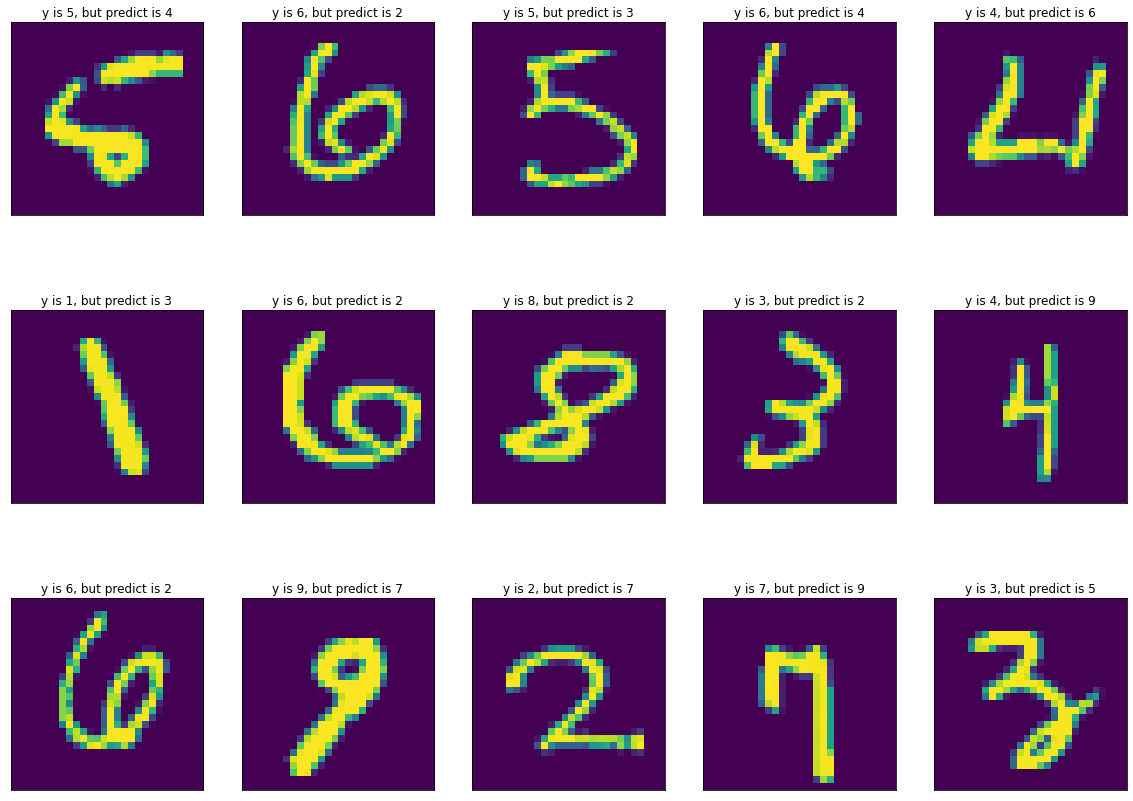

In [26]:
def show_mistake_image(images, labels, predict):    
    # 間違えた画像をリスト化
    mistake_list = []
    for image, y, pred in zip(images, labels, predict):
        if y != pred:
            mistake_list.append({
                'y': y,
                'pred': pred,
                'image': image
            })

    # 画像の一覧を表示
    rows = int((len(mistake_list)-1)/5)+1
    fig, ax = plt.subplots(rows, 5, figsize=(20, rows*5))
    for idx, mistake in enumerate(mistake_list):
        col = idx % 5
        row = int(idx/5)

        ax[row][col].imshow(mistake['image'])
        ax[row][col].get_xaxis().set_visible(False)
        ax[row][col].get_yaxis().set_visible(False)
        ax[row][col].set_title('y is {}, but predict is {}'.format(mistake['y'], mistake['pred']))

show_mistake_image(x_test, y_test, predict)